In [1]:
import os
import torch
import numpy as np
import skimage.transform
import matplotlib.pyplot as plt
import cv2
from model import Model
from IPython import display

%matplotlib inline
%reload_ext autoreload
%autoreload 2

import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (15, 10)


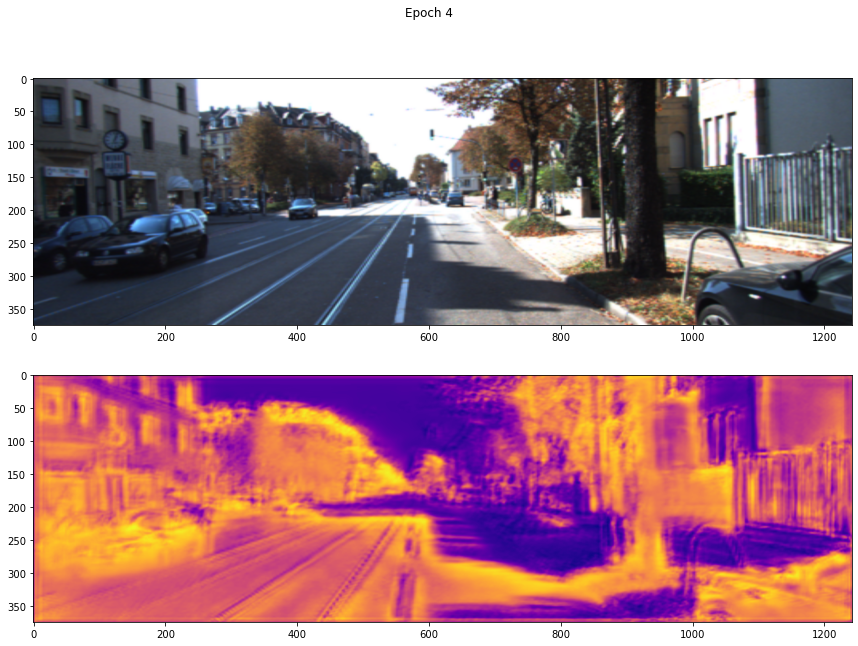

In [2]:
model = Model()

# model.load()

fig, ax = plt.subplots(ncols=1, nrows=2)
epochs = 5

for epoch in range(epochs):
    model.train(epoch)
    fig.suptitle('Epoch {}'.format(epoch))
    d, dpp, ref_img = model.test()
    resized_d0 = cv2.resize(d[0], (1242, 375), interpolation=cv2.INTER_LINEAR)
    resized_i0 = cv2.resize(np.moveaxis(ref_img, 0, -1), (1242, 375), interpolation=cv2.INTER_LINEAR)
    ax[0].imshow(resized_i0)
    ax[1].imshow(resized_d0, cmap='plasma')
    
    display.display(plt.gcf())
    display.clear_output(wait=True)

In [3]:
# d, dpp, _ = model.test()
# np.save(path.join(self.output_directory, 'disparities.npy'), d)
# np.save(path.join(self.output_directory, 'disparities_pp.npy'), dpp)